In [ ]:
!wget https://raw.githubusercontent.com/snehilkumbhani/scikitlearn/refs/heads/main/Iris.csv

--2025-07-17 08:31:30--  https://raw.githubusercontent.com/snehilkumbhani/scikitlearn/refs/heads/main/Iris.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5107 (5.0K) [text/plain]
Saving to: ‘Iris.csv’

Iris.csv            100%[===================>]   4.99K  --.-KB/s    in 0s      

2025-07-17 08:31:30 (47.3 MB/s) - ‘Iris.csv’ saved [5107/5107]



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Top 5 classifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import ConfusionMatrixDisplay
import joblib
from google.colab import files

In [ ]:
df=pd.read_csv("/content/Iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
df.isnull().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df['Species'].value_counts()

,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


<Axes: xlabel='Species'>

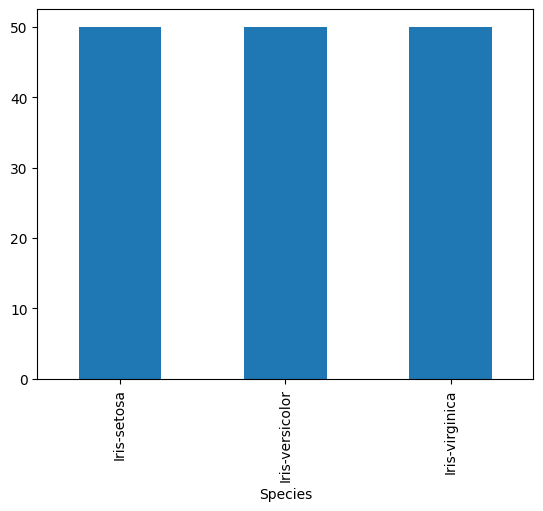

In [ ]:
df['Species'].value_counts().plot(kind = "bar")

In [ ]:
df = df.drop(['Id'], axis = 1)

array([[<Axes: title={'center': 'SepalLengthCm'}>,
        <Axes: title={'center': 'SepalWidthCm'}>],
       [<Axes: title={'center': 'PetalLengthCm'}>,
        <Axes: title={'center': 'PetalWidthCm'}>]], dtype=object)

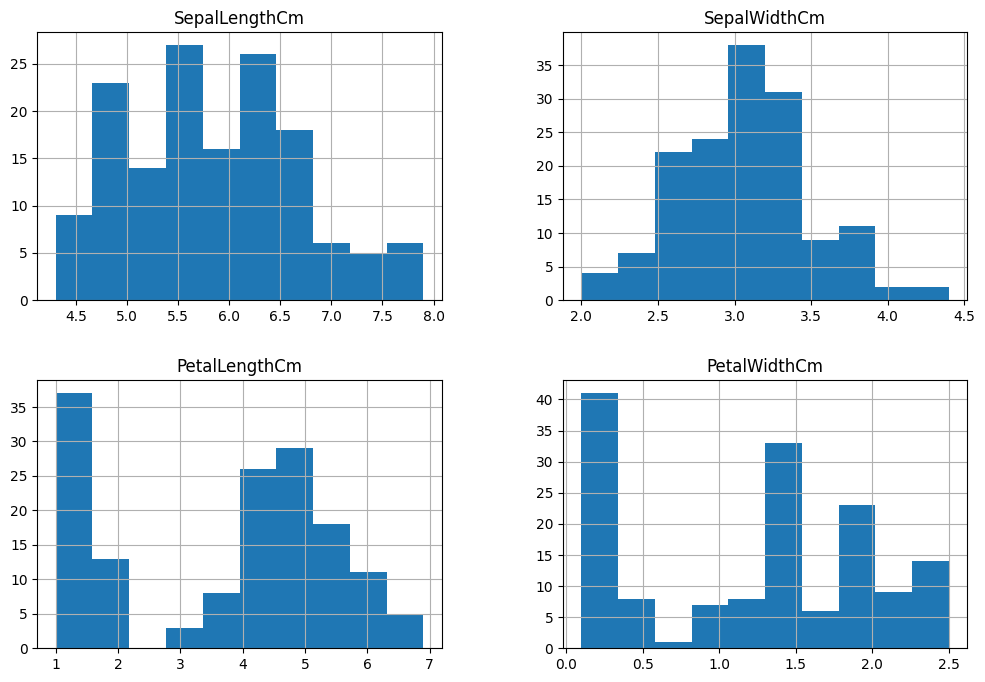

In [ ]:
df.hist(figsize = (12, 8))

In [ ]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
X=df.drop("Species",axis=1)
y=df["Species"]

In [ ]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)


x_train, x_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [ ]:
def evaluate_model(model, x_test, y_test):
    y_pred = model.predict(x_test)

    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)  # this line was missing before
    matrix = confusion_matrix(y_test, y_pred)

    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    disp = ConfusionMatrixDisplay(confusion_matrix=matrix)
    disp.plot()

    return {
        "accuracy": accuracy,
        "report": report,
        "confusion_matrix": matrix
    }


In [ ]:
model1 = RandomForestClassifier()
model1.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
model1.predict(x_test)


array([0, 2, 1, 1, 0, 1, 0, 0, 2, 1, 2, 2, 2, 1, 0, 0, 0, 1, 1, 2, 0, 2,
       1, 1, 2, 2, 1, 0, 2, 0])

Accuracy: 0.9333
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



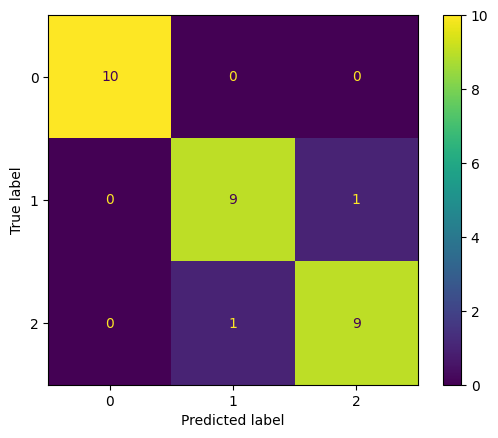

In [ ]:
model1_results=evaluate_model(model1, x_test, y_test)

In [ ]:
model1_results

{'accuracy': 0.9333333333333333,
 'report': {'0': {'precision': 1.0,
   'recall': 1.0,
   'f1-score': 1.0,
   'support': 10.0},
  '1': {'precision': 0.9, 'recall': 0.9, 'f1-score': 0.9, 'support': 10.0},
  '2': {'precision': 0.9, 'recall': 0.9, 'f1-score': 0.9, 'support': 10.0},
  'accuracy': 0.9333333333333333,
  'macro avg': {'precision': 0.9333333333333332,
   'recall': 0.9333333333333332,
   'f1-score': 0.9333333333333332,
   'support': 30.0},
  'weighted avg': {'precision': 0.9333333333333333,
   'recall': 0.9333333333333333,
   'f1-score': 0.9333333333333333,
   'support': 30.0}},
 'confusion_matrix': array([[10,  0,  0],
        [ 0,  9,  1],
        [ 0,  1,  9]])}

In [ ]:
model2 = LogisticRegression()
model2.fit(x_train, y_train)

LogisticRegression()

In [ ]:
model2.predict(x_test)


array([0, 2, 1, 1, 0, 1, 0, 0, 2, 1, 2, 2, 2, 1, 0, 0, 0, 1, 1, 2, 0, 2,
       1, 2, 2, 2, 1, 0, 2, 0])

Accuracy: 0.9667
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



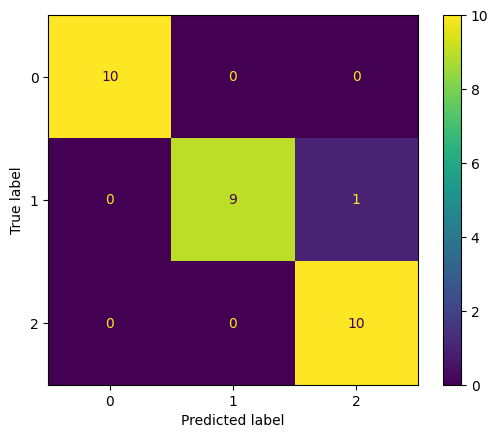

In [ ]:
model2_results=evaluate_model(model2, x_test, y_test)

In [ ]:
model3 = KNeighborsClassifier()
model3.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
model3.predict(x_test)


array([0, 2, 1, 1, 0, 1, 0, 0, 2, 1, 2, 2, 2, 1, 0, 0, 0, 1, 1, 2, 0, 2,
       1, 2, 2, 1, 1, 0, 2, 0])

Accuracy: 1.0000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



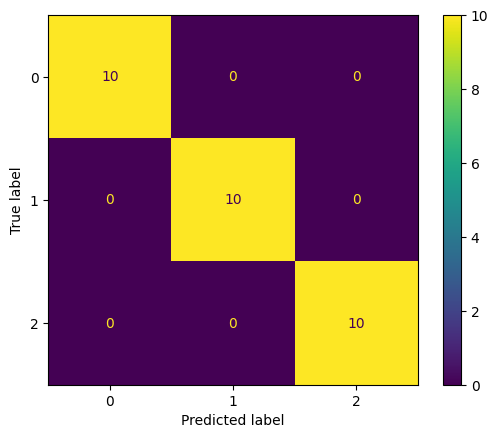

In [ ]:
model3_results=evaluate_model(model3, x_test, y_test)

In [ ]:
model4 = SVC()
model4.fit(x_train, y_train)

SVC()

In [ ]:
model4.predict(x_test)

array([0, 2, 1, 1, 0, 1, 0, 0, 2, 1, 2, 2, 2, 1, 0, 0, 0, 1, 1, 2, 0, 2,
       1, 2, 2, 2, 1, 0, 2, 0])

Accuracy: 0.9667
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



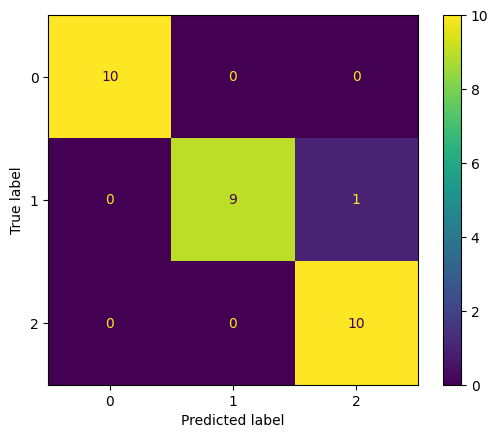

In [ ]:
model4_results=evaluate_model(model4, x_test, y_test)

In [ ]:
model5=GaussianNB()
model5.fit(x_train, y_train)

GaussianNB()

In [ ]:
model5.predict(x_test)

array([0, 2, 1, 1, 0, 1, 0, 0, 2, 1, 2, 2, 2, 1, 0, 0, 0, 1, 1, 2, 0, 2,
       1, 2, 2, 2, 1, 0, 2, 0])

Accuracy: 0.9667
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



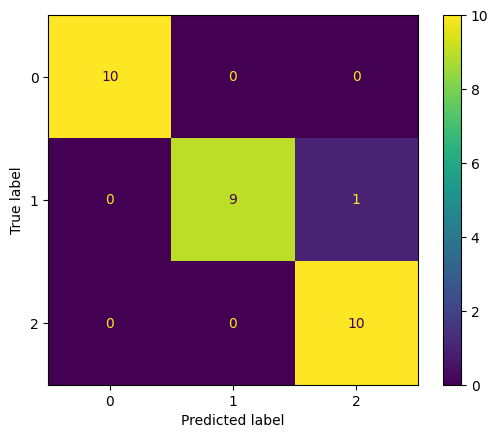

In [ ]:
model5_results=evaluate_model(model5, x_test, y_test)

In [ ]:
model_accuracies = {
    "Random Forest": model1_results["accuracy"],
    "Logistic Regression": model2_results["accuracy"],
    "K-Nearest Neighbors": model3_results["accuracy"],
    "Support Vector Classifier": model4_results["accuracy"],
    "Naive Bayes": model5_results["accuracy"]
}

In [ ]:
model_accuracies_df = pd.DataFrame(list(model_accuracies.items()), columns=["Model", "Accuracy"])
model_accuracies_df = model_accuracies_df.sort_values(by="Accuracy", ascending=False)
print(model_accuracies_df)

                       Model  Accuracy
2        K-Nearest Neighbors  1.000000
3  Support Vector Classifier  0.966667
1        Logistic Regression  0.966667
4                Naive Bayes  0.966667
0              Random Forest  0.933333


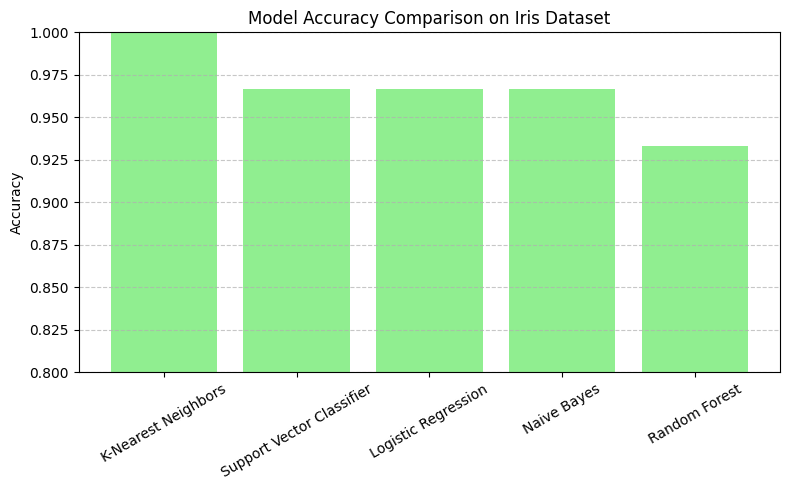

In [ ]:
plt.figure(figsize=(8, 5))
plt.bar(model_accuracies_df["Model"], model_accuracies_df["Accuracy"], color='lightgreen')
plt.title("Model Accuracy Comparison on Iris Dataset")
plt.ylabel("Accuracy")
plt.ylim(0.8, 1.0)
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
cv_scores = cross_val_score(model3, X, y, cv=5, scoring='accuracy')

# Display results
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", np.mean(cv_scores))
print("Standard deviation:", np.std(cv_scores))

Cross-validation scores: [0.96666667 1.         0.93333333 0.96666667 1.        ]
Mean CV accuracy: 0.9733333333333334
Standard deviation: 0.02494438257849294


In [ ]:
joblib.dump(model3, "model3.pkl")

['model3.pkl']

In [ ]:
joblib.dump(le, "label_encoder.pkl")

['label_encoder.pkl']

In [ ]:
files.download("model3.pkl")
files.download("label_encoder.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>